In [1]:
import numpy as np
import os 
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data_dir = '/home/vipinainvijayan4286/Data/train'

In [3]:
data = ImageDataGenerator(validation_split = 0.20,rotation_range=20,)

In [4]:
train_ds = data.flow_from_directory(data_dir,class_mode = "categorical",
                                    target_size = (229, 229),
                                    batch_size = 32,
                                    shuffle = True,subset='training',seed = 42)

Found 4116 images belonging to 3 classes.


In [5]:
validation = data.flow_from_directory(data_dir,class_mode = "categorical",target_size = (229, 229),batch_size = 32,shuffle = True,subset='validation',seed = 42)

Found 1028 images belonging to 3 classes.


In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[229,229,3]),
    keras.layers.Dense(300, input_shape=(4,), activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),    
    keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(3, activation="softmax")
])

In [15]:
model.compile(loss="categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 157323)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 300)               47197200  
_________________________________________________________________
dropout_23 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 500)               50500     
_________________________________________________________________
dropout_25 (Dropout)         (None, 500)              

In [10]:
history = model.fit(train_ds,epochs=10,verbose=1,validation_data = validation)

Epoch 1/15
129/129 [==============================] - 333s 3s/step - loss: 4360.9922 - accuracy: 0.5724 - val_loss: 0.9013 - val_accuracy: 0.7014
Epoch 2/15
129/129 [==============================] - 344s 3s/step - loss: 31.3620 - accuracy: 0.6635 - val_loss: 0.8362 - val_accuracy: 0.6644
Epoch 3/15
129/129 [==============================] - 364s 3s/step - loss: 52.3008 - accuracy: 0.6603 - val_loss: 0.8332 - val_accuracy: 0.6634
Epoch 4/15
129/129 [==============================] - 354s 3s/step - loss: 0.9880 - accuracy: 0.6652 - val_loss: 0.8314 - val_accuracy: 0.6654
Epoch 5/15
129/129 [==============================] - 348s 3s/step - loss: 0.8944 - accuracy: 0.6647 - val_loss: 0.8329 - val_accuracy: 0.6644
Epoch 6/15
129/129 [==============================] - 361s 3s/step - loss: 0.8344 - accuracy: 0.6645 - val_loss: 0.8329 - val_accuracy: 0.6644
Epoch 7/15
129/129 [==============================] - 368s 3s/step - loss: 33.2936 - accuracy: 0.6638 - val_loss: 0.8345 - val_accuracy: 

In [13]:
test_folder_path = "/home/vipinainvijayan4286/Data/test"
datagen = ImageDataGenerator()
test_generator = datagen.flow_from_directory(test_folder_path,target_size=(229, 229),batch_size=32,shuffle=False,)

Found 1288 images belonging to 3 classes.


In [14]:
predictions=model.predict(test_generator)

In [ ]:
# Extracting training and validation metrics from the history object
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_acc) + 1)

    # Plotting accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

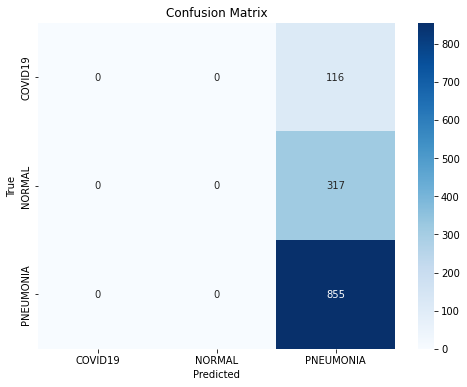

Classification Report:
               precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00       116
      NORMAL       0.00      0.00      0.00       317
   PNEUMONIA       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Get true labels
true_labels = test_generator.classes

# Use the model to predict the classes
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys()))